USING KERAS

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

KeyboardInterrupt: 

In [ ]:
(train_data,train_label),(test_data,test_label)=tf.keras.datasets.imdb.load_data(num_words=10000)

In [ ]:
train_label[0]

1

In [ ]:
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [ ]:
word_index=tf.keras.datasets.imdb.get_word_index()

In [ ]:
# Use the default parameters to keras.datasets.imdb.load_data
start_char = 1
oov_char = 2
index_from = 3
# Retrieve the training sequences.
(train_data,train_label),(test_data,test_label)= tf.keras.datasets.imdb.load_data(
    start_char=start_char, oov_char=oov_char, index_from=index_from,num_words=10000
)
# Retrieve the word index file mapping words to indices
word_index = tf.keras.datasets.imdb.get_word_index()
# Reverse the word index to obtain a dict mapping indices to words
# And add `index_from` to indices to sync with `x_train`
inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word_index.items()
)
# Update `inverted_word_index` to include `start_char` and `oov_char`
inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char] = "[OOV]"
# Decode the first sequence in the dataset
decoded_sequence = " ".join(inverted_word_index[i] for i in train_data[0])

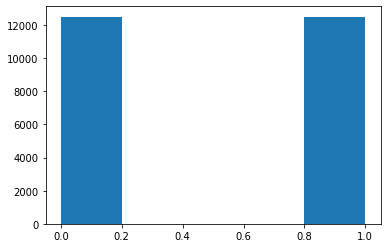

In [ ]:
plt.hist(train_label,bins=5)
plt.show()

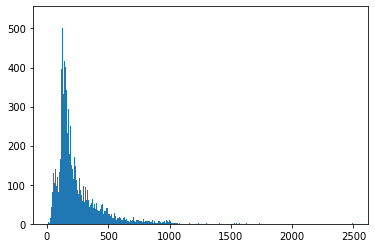

In [ ]:
lengths=[len(t) for t in train_data]
plt.hist(lengths,bins=len(set(lengths)))
plt.show()

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train.shape

(25000, 10000)

In [ ]:
x_test.shape

(25000, 10000)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.array(train_label).astype('float32')
y_test = np.array(test_label).astype('float32')

In [ ]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [ ]:
limit=int(x_train.shape[0]*0.80)

In [ ]:
x_val=x_train[:limit]
x_train_=x_train[limit:]
y_val=y_train[:limit]
y_train_=y_train[limit:]

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation='relu',input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                320032    
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321,633
Trainable params: 321,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train_,y_train_,validation_data=(x_val,y_val), epochs=20, batch_size=64,
callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
    ])

Epoch 1/20
79/79 [==============================] - 4s 32ms/step - loss: 0.4900 - accuracy: 0.7718 - val_loss: 0.3264 - val_accuracy: 0.8684
Epoch 2/20
79/79 [==============================] - 2s 21ms/step - loss: 0.1744 - accuracy: 0.9382 - val_loss: 0.3463 - val_accuracy: 0.8634
Epoch 3/20
79/79 [==============================] - 2s 20ms/step - loss: 0.0621 - accuracy: 0.9860 - val_loss: 0.4058 - val_accuracy: 0.8599
Epoch 4/20
79/79 [==============================] - 2s 20ms/step - loss: 0.0196 - accuracy: 0.9978 - val_loss: 0.4672 - val_accuracy: 0.8583


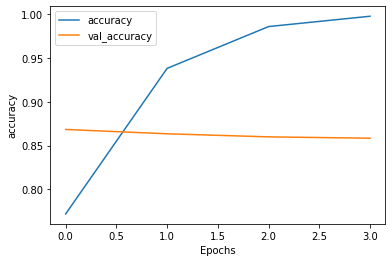

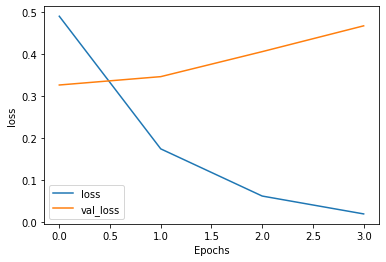

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.4835 - accuracy: 0.8526


[0.48354652523994446, 0.8525999784469604]

In [ ]:
diff=0.9978-0.8529

In [ ]:
diff<=2.5

True

In [ ]:
predict=model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


In [ ]:
np.around(predict[1])

array([1.], dtype=float32)

In [ ]:
y_test[1]

1.0